In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_csv("processed_laptops.csv")

In [55]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [57]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [58]:
df.describe(include="object")

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# Explore features or characteristics to predict price of car

In [59]:
df.corr(numeric_only=True)

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
Unnamed: 0.1,1.000000,1.000000,0.028451,0.022852,-0.092529,-0.037261,-0.153588,0.424423,0.089017,-0.124216,-0.153316,0.321933,0.062944,-0.062944
Unnamed: 0,1.000000,1.000000,0.028451,0.022852,-0.092529,-0.037261,-0.153588,0.424423,0.089017,-0.124216,-0.153316,0.321933,0.062944,-0.062944
Category,0.028451,0.028451,1.000000,-0.114174,-0.043378,0.232425,-0.285392,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.117608,0.117608
GPU,0.022852,0.022852,-0.114174,1.000000,-0.199549,0.145388,0.154251,0.291439,0.218973,0.094288,0.262853,0.288298,-0.089582,0.089582
OS,-0.092529,-0.092529,-0.043378,-0.199549,1.000000,0.016954,0.146695,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.172891,-0.172891
CPU_core,-0.037261,-0.037261,0.232425,0.145388,0.016954,1.000000,0.041092,0.242722,0.473075,0.400015,0.068599,0.459398,0.003837,-0.003837
Screen_Size_inch,-0.153588,-0.153588,-0.285392,0.154251,0.146695,0.041092,1.000000,-0.000948,0.018194,0.119699,0.797534,-0.110644,0.342912,-0.342912
CPU_frequency,0.424423,0.424423,-0.053414,0.291439,0.050407,0.242722,-0.000948,1.000000,0.226736,0.035557,0.066522,0.366666,0.055273,-0.055273
RAM_GB,0.089017,0.089017,0.030127,0.218973,-0.074625,0.473075,0.018194,0.226736,1.000000,0.361469,0.055068,0.549297,0.017913,-0.017913
Storage_GB_SSD,-0.124216,-0.124216,0.038246,0.094288,0.007751,0.400015,0.119699,0.035557,0.361469,1.000000,0.112519,0.243421,0.061402,-0.061402


# let's visualize the above relationships for continuous data

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

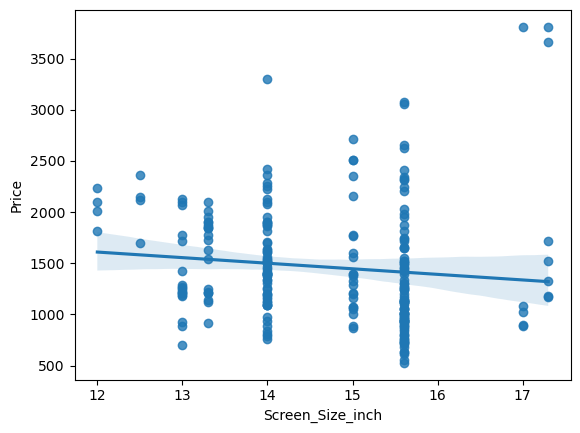

In [60]:
sns.regplot(x="Screen_Size_inch",y="Price",data=df)

In [61]:
df[["Screen_Size_inch","Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


While the Screen_Size_inch increases there is slightly decrease in the price but this column(Screen_Size_inch) in not useful to predict the price

<Axes: xlabel='CPU_frequency', ylabel='Price'>

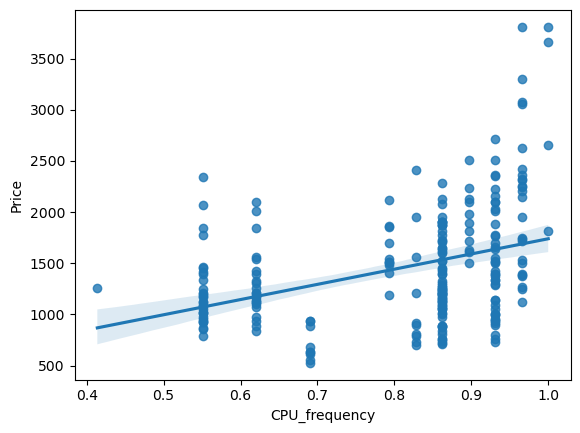

In [62]:
sns.regplot(x="CPU_frequency",y="Price",data=df)

In [63]:
df[["CPU_frequency","Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


while the CPU_frequency is increasing the price also increasing slowly , so this column(CPU_frequency) may useful to predict the price

<Axes: xlabel='Weight_pounds', ylabel='Price'>

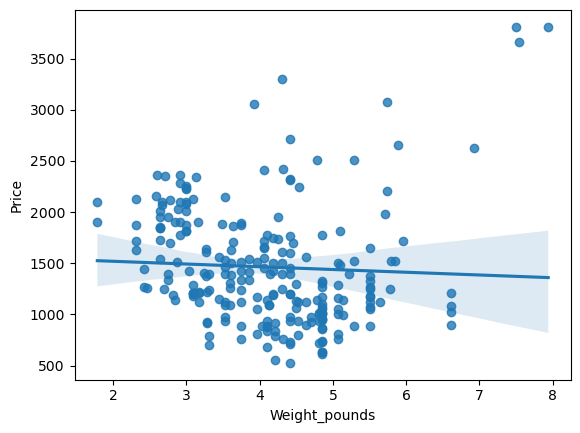

In [64]:
sns.regplot(x="Weight_pounds",y="Price",data=df)

In [65]:
df[["Weight_pounds","Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


  There is an very slow rate of change in the price of laptop that is while the weight(Weight_pounds) of laptop increase the price decreases slowly, so this column(Weight_pounds) is not useful to predict the price

<Axes: xlabel='CPU_core', ylabel='Price'>

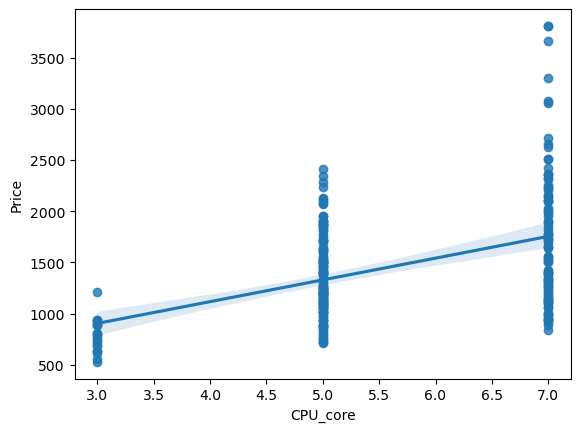

In [66]:
sns.regplot(x="CPU_core",y="Price",data=df)

In [67]:
df[["CPU_core","Price"]].corr()

,CPU_core,Price
CPU_core,1.000000,0.459398
Price,0.459398,1.000000


# Categorical Features

In [68]:
df.describe(include="object")

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


<Axes: xlabel='Price-binned', ylabel='Price'>

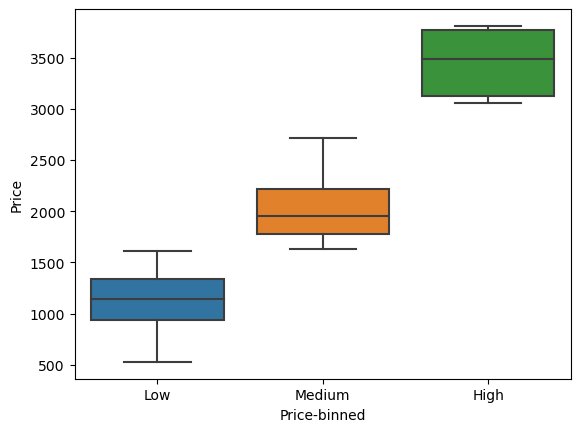

In [69]:
sns.boxplot(x="Price-binned",y="Price",data=df)

<Axes: xlabel='Manufacturer', ylabel='Price'>

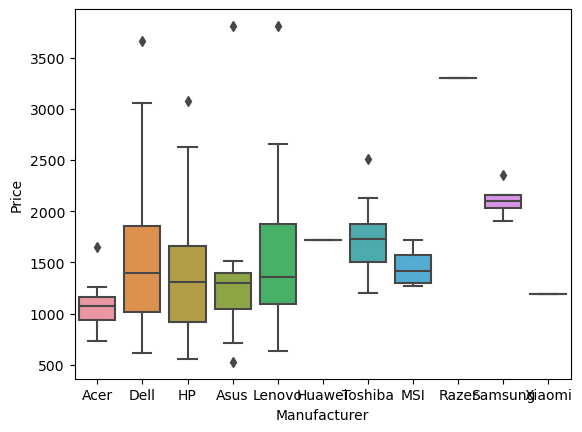

In [70]:
sns.boxplot(x="Manufacturer",y="Price",data=df)

In [71]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0
237,237,237,Toshiba,3,2,1,5,14.0,0.793103,8,256,4.29975,1499,Low,1,0


<Axes: xlabel='Category', ylabel='Price'>

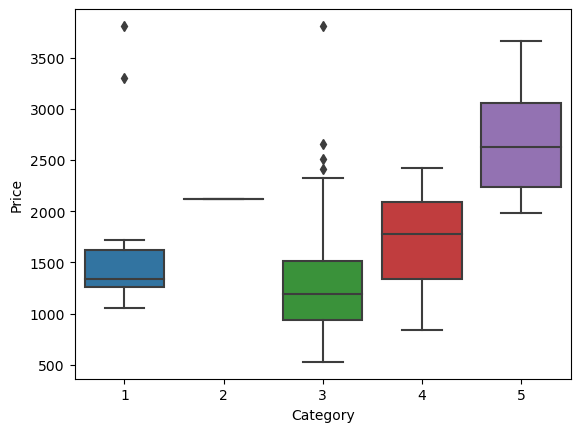

In [72]:
sns.boxplot(x="Category",y="Price",data=df)

you will see that the box plots are overlapped , its means there is weak or no relationship between the Category and Price

<Axes: xlabel='GPU', ylabel='Price'>

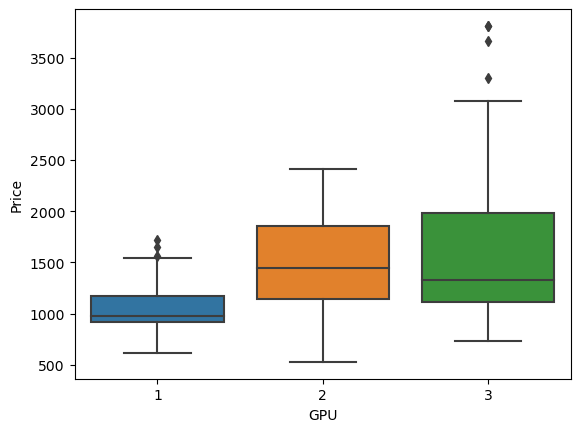

In [73]:
sns.boxplot(x="GPU",y="Price",data=df)

you will see that the box plots are overlapped , its means there is weak or no relationship between the GPU and Price

<Axes: xlabel='OS', ylabel='Price'>

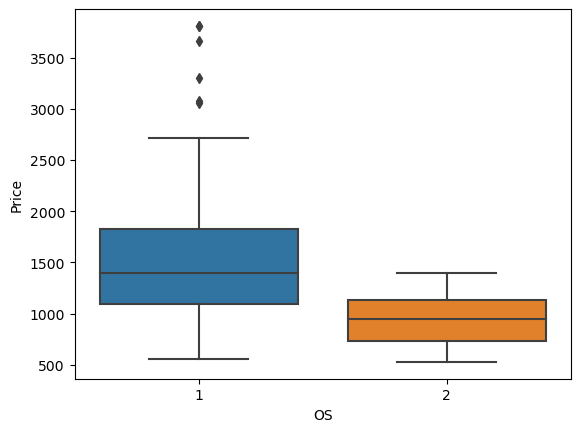

In [74]:
sns.boxplot(x="OS",y="Price",data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

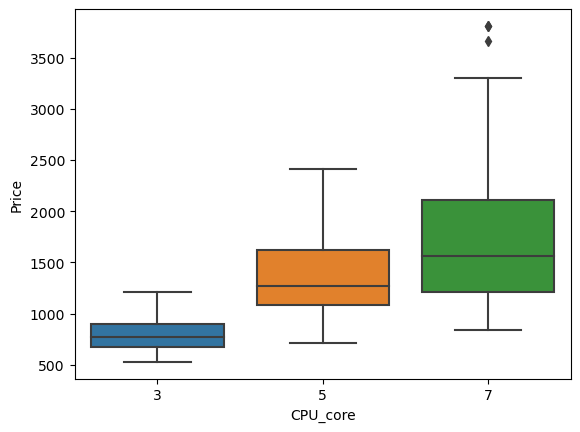

In [75]:
sns.boxplot(x="CPU_core",y="Price",data=df)

CPU_core is somewhat overlapped on there data related to price , so have weak or partial relationship with price

<Axes: xlabel='RAM_GB', ylabel='Price'>

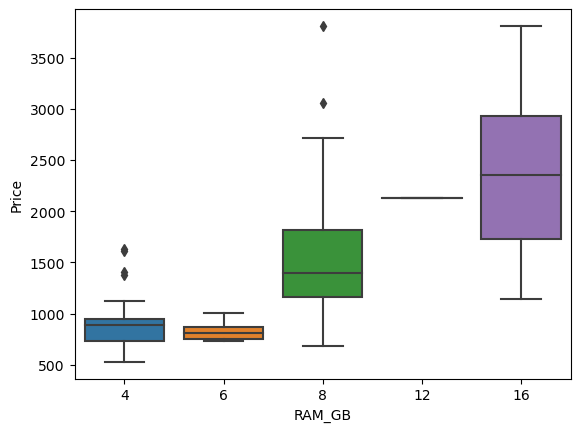

In [76]:
sns.boxplot(x="RAM_GB",y="Price",data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

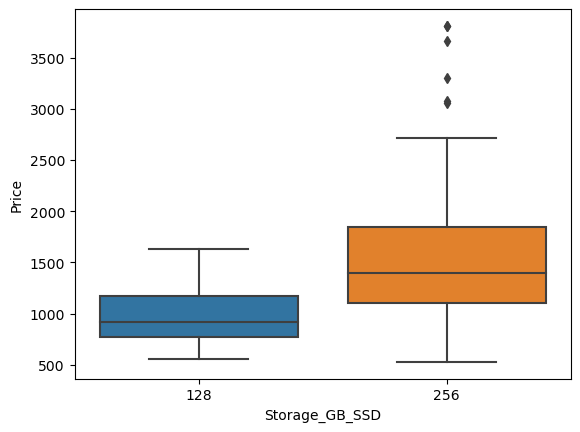

In [77]:
sns.boxplot(x="Storage_GB_SSD",y="Price",data=df)

# Descriptive Statistical Analysis

In [78]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

In [80]:
df_sub=df[["CPU_core","OS","Price"]]

In [84]:
group_test1=df_sub.groupby(["CPU_core","OS"],as_index=False).mean()
group_test1

,CPU_core,OS,Price
0,3,1,805.111111
1,3,2,571.500000
2,5,1,1388.228814
3,5,2,887.400000
4,7,1,1777.068182
5,7,2,1110.428571


In [85]:
group_test1.pivot(index="CPU_core",columns="OS")

Price             
OS                  1            2
CPU_core                          
3          805.111111   571.500000
5         1388.228814   887.400000
7         1777.068182  1110.428571

From above analysis,we noticed that the laptop having CPU_core= 7 and OS =1 having the highest average price than others

In [86]:
df_sub2=df[["GPU","CPU_core","Price"]]

In [87]:
group2=df_sub2.groupby(["GPU","CPU_core"],as_index=False).mean()

In [88]:
group2.pivot(index="GPU",columns="CPU_core")

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

The GPU =2 and CPU_core = 7 having highest average price than others

From the above analysis we observed that laptop with OS=1, GPU=2 and CPU_core=7 has highest prices

# Pearson Correlation and p-values

Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

In [92]:
from scipy import stats

In [95]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param+":")
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
    

RAM_GB:
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857845  with a P-value of P = 3.681560628842711e-20
CPU_frequency:
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588626  with a P-value of P = 5.502463350713296e-09
Storage_GB_SSD:
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
Screen_Size_inch:
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830666
Weight_pounds:
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751554  with a P-value of P = 0.43976938534338944
CPU_core:
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355117  with a P-value of P = 7.912950127009034e-14
OS:
The Pearson Correlation Coefficient for  OS  is -0.22172980114827376  with a P-value of P = 0.0005696642559246749
GPU:
The Pearson Correlation Coefficient for  GPU  is 0.288298198888

From the pearson coefficient and p value we observed that RAM_GB and Price has Strong relation ship ,CPU_core and CPU_frequency has partial relationship with Price,remaining columns have an weak relationship with Price

<Axes: >

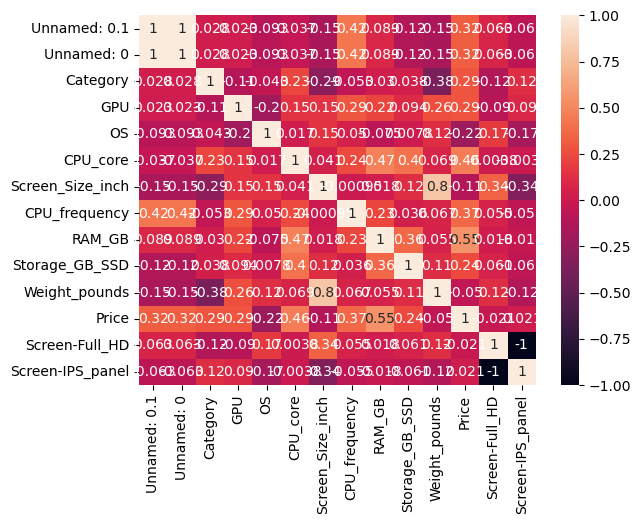

In [105]:
sns.heatmap(df.corr(numeric_only=True),annot=True)